In [80]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import LSTM
print("All libraries have been imported")

All libraries have been imported


In [81]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Actual CPI Value')
    plt.plot(predicted, color='blue',label='Predicted CPI Value')
    plt.title("Malaysia's CPI Value")
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    
def return_analysis(test,predicted):
    e=predicted-test
    mse_f = np.mean(e**2)
    mae_f = np.mean(abs(e))
    mape_f = np.mean(abs(e/predicted))*100
    rmse_f = np.sqrt(mse_f)
    r2_f = 1-(sum(e**2)/sum((predicted-np.mean(predicted))**2))
    print("The root mean squared error is {}.".format(rmse_f))
    print("The mean absolute error is {}.".format(mae_f))
    print("The mean absolute percentage error is {}.".format(mape_f), "%")    

In [10]:
# Read in the weather data csv - keep only the columns we need
df=pd.read_csv('/Users/chamyingchyi/Desktop/Academic Purpose/FYP/Dataset/Cleaned_Data.csv', encoding='utf-8')
df1=df[["Date","CPI"]]
df2=df1[0:657]
print(df2)

       Date    CPI
0    Jan-68   23.4
1    Feb-68   23.3
2    Mar-68   23.3
3    Apr-68   23.2
4    May-68   23.0
..      ...    ...
652  May-22  126.6
653  Jun-22  127.4
654  Jul-22  127.9
655  Aug-22  128.2
656  Sep-22  128.3

[657 rows x 2 columns]


In [76]:
# Checking for missing values
training_set = df2.iloc[0:524,1:2].values
test_set =df2.iloc[526:657,1:2].values

print(training_set,test_set)

[[ 23.4]
 [ 23.3]
 [ 23.3]
 [ 23.2]
 [ 23. ]
 [ 22.8]
 [ 22.8]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.6]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 23. ]
 [ 23. ]
 [ 23.2]
 [ 23.3]
 [ 23.4]
 [ 23.4]
 [ 23.3]
 [ 23.3]
 [ 23.3]
 [ 23.3]
 [ 23.4]
 [ 23.3]
 [ 23.4]
 [ 23.4]
 [ 23.5]
 [ 23.5]
 [ 23.9]
 [ 24. ]
 [ 23.8]
 [ 23.6]
 [ 23.5]
 [ 23.5]
 [ 23.4]
 [ 23.5]
 [ 23.6]
 [ 23.9]
 [ 24. ]
 [ 24.2]
 [ 24.3]
 [ 24.3]
 [ 24.3]
 [ 24.4]
 [ 24.3]
 [ 24.4]
 [ 24.5]
 [ 24.5]
 [ 24.6]
 [ 24.6]
 [ 24.7]
 [ 25. ]
 [ 25.3]
 [ 25.5]
 [ 25.5]
 [ 25.8]
 [ 26.4]
 [ 26.7]
 [ 27.2]
 [ 27.5]
 [ 28.1]
 [ 28.5]
 [ 29.2]
 [ 29.6]
 [ 29.9]
 [ 30.9]
 [ 31.5]
 [ 31.2]
 [ 31.5]
 [ 31.7]
 [ 31.9]
 [ 32.2]
 [ 32.3]
 [ 32.5]
 [ 32.9]
 [ 33.2]
 [ 33.4]
 [ 33.5]
 [ 33.1]
 [ 33. ]
 [ 33. ]
 [ 33. ]
 [ 33. ]
 [ 33.2]
 [ 33.4]
 [ 33.3]
 [ 33. ]
 [ 33.5]
 [ 33.9]
 [ 33.6]
 [ 33.7]
 [ 33.6]
 [ 33.7]
 [ 34.1]
 [ 34.1]
 [ 34.2]
 [ 34.3]
 [ 34.3]
 [ 34.3]
 [ 34.8]
 [ 35.3]
 [ 35.3]
 [ 35.3]
 

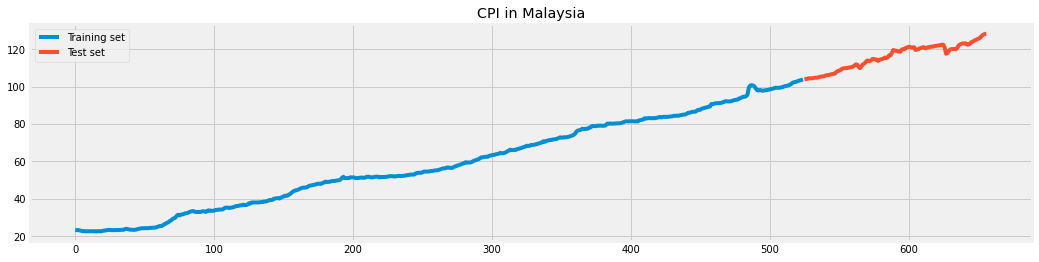

In [12]:
df2.iloc[0:525,1].plot(figsize=(16,4),legend=True)
df2.iloc[525:657,1].plot(figsize=(16,4),legend=True)
plt.legend(['Training set','Test set'])
plt.title('CPI in Malaysia')
plt.show()

In [29]:
print("We have", len(training_set), "train values")
print("We have", len(test_set), "test values")

We have 525 train values
We have 132 test values


In [70]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(training_set)
test_sc = scaler.transform(test_set)

test_sc


array([[1.00987654],
       [1.01234568],
       [1.01481481],
       [1.02222222],
       [1.02222222],
       [1.02222222],
       [1.02222222],
       [1.02716049],
       [1.02962963],
       [1.02962963],
       [1.0345679 ],
       [1.03950617],
       [1.04444444],
       [1.04691358],
       [1.04691358],
       [1.05679012],
       [1.0617284 ],
       [1.06419753],
       [1.06666667],
       [1.07407407],
       [1.07654321],
       [1.08148148],
       [1.08395062],
       [1.10617284],
       [1.11604938],
       [1.12345679],
       [1.1308642 ],
       [1.14567901],
       [1.15308642],
       [1.15555556],
       [1.15555556],
       [1.15802469],
       [1.16296296],
       [1.1654321 ],
       [1.17037037],
       [1.17530864],
       [1.19012346],
       [1.20493827],
       [1.20246914],
       [1.17283951],
       [1.15555556],
       [1.18024691],
       [1.20493827],
       [1.21481481],
       [1.23209877],
       [1.25432099],
       [1.25432099],
       [1.246

In [66]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

X_train

array([[-0.98024691],
       [-0.98271605],
       [-0.98271605],
       [-0.98518519],
       [-0.99012346],
       [-0.99506173],
       [-0.99506173],
       [-0.99753086],
       [-0.99753086],
       [-0.99753086],
       [-0.99753086],
       [-0.99753086],
       [-0.99753086],
       [-0.99753086],
       [-0.99753086],
       [-1.        ],
       [-0.99753086],
       [-0.99753086],
       [-0.99753086],
       [-0.99753086],
       [-0.99012346],
       [-0.99012346],
       [-0.98518519],
       [-0.98271605],
       [-0.98024691],
       [-0.98024691],
       [-0.98271605],
       [-0.98271605],
       [-0.98271605],
       [-0.98271605],
       [-0.98024691],
       [-0.98271605],
       [-0.98024691],
       [-0.98024691],
       [-0.97777778],
       [-0.97777778],
       [-0.96790123],
       [-0.9654321 ],
       [-0.97037037],
       [-0.97530864],
       [-0.97777778],
       [-0.97777778],
       [-0.98024691],
       [-0.97777778],
       [-0.97530864],
       [-0

In [47]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)


Epoch 1/100
523/523 [==============================] - 2s 2ms/step - loss: 0.3715
Epoch 2/100
523/523 [==============================] - 1s 2ms/step - loss: 0.0795
Epoch 3/100
523/523 [==============================] - 1s 2ms/step - loss: 0.0137
Epoch 4/100
523/523 [==============================] - 1s 2ms/step - loss: 0.0040
Epoch 5/100
523/523 [==============================] - 1s 2ms/step - loss: 0.0019
Epoch 6/100
523/523 [==============================] - 1s 2ms/step - loss: 0.0012
Epoch 7/100
523/523 [==============================] - 1s 2ms/step - loss: 8.8351e-04
Epoch 8/100
523/523 [==============================] - 1s 2ms/step - loss: 7.5112e-04
Epoch 9/100
523/523 [==============================] - 1s 2ms/step - loss: 6.1380e-04
Epoch 10/100
523/523 [==============================] - 1s 2ms/step - loss: 5.1566e-04
Epoch 11/100
523/523 [==============================] - 1s 2ms/step - loss: 4.3430e-04
Epoch 12/100
523/523 [==============================] - 1s 2ms/step - loss: 

In [83]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.997
The R2 score on the Test set is:	0.961


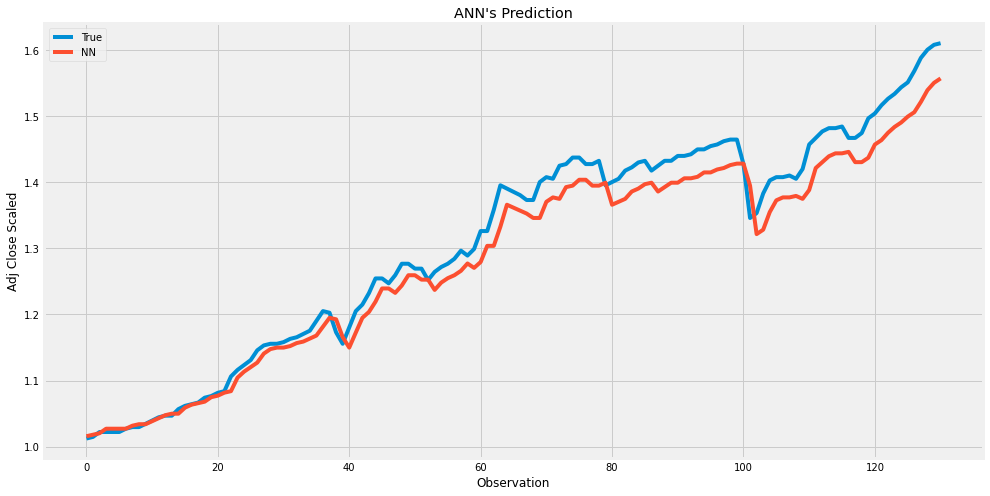

In [85]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

In [84]:
def create_NN(input_nodes, hidden_nodes, output_nodes):
    model = Sequential()
    model.add(Dense(int(hidden_nodes), input_dim=int(input_nodes)))
    model.add(Dense(int(output_nodes)))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [73]:
y_pred_test_nn = scaler.inverse_transform(y_pred_test_nn)

y_pred_test_nn

array([[104.24124 ],
       [104.333206],
       [104.425156],
       [104.70103 ],
       [104.70103 ],
       [104.70103 ],
       [104.70103 ],
       [104.88494 ],
       [104.97689 ],
       [104.97689 ],
       [105.16081 ],
       [105.34472 ],
       [105.52864 ],
       [105.620605],
       [105.620605],
       [105.98843 ],
       [106.17233 ],
       [106.2643  ],
       [106.356255],
       [106.63212 ],
       [106.72408 ],
       [106.90799 ],
       [106.999954],
       [107.82756 ],
       [108.19539 ],
       [108.47126 ],
       [108.74712 ],
       [109.298874],
       [109.57474 ],
       [109.666695],
       [109.666695],
       [109.75865 ],
       [109.942566],
       [110.03453 ],
       [110.21844 ],
       [110.40236 ],
       [110.94899 ],
       [111.48842 ],
       [111.39852 ],
       [110.310394],
       [109.666695],
       [110.58627 ],
       [111.48842 ],
       [111.848045],
       [112.477394],
       [113.28654 ],
       [113.28654 ],
       [113.0

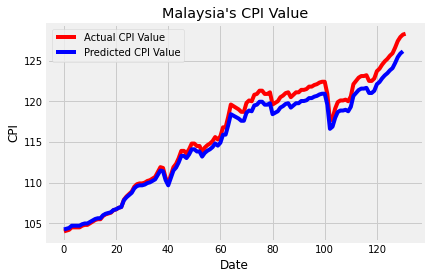

In [74]:
# Visualizing the results for GRU
plot_predictions(test_set,y_pred_test_nn)

In [78]:
# Evaluating GRU
return_analysis(test_set,y_pred_test_nn)


The root mean squared error is 1.3219226717938306.
The mean absolute error is 1.1002460275897543.
The mean absolute percentage error is 0.9304940857376731. %
